In [1]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep =',')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep =',')

In [4]:
# data visualisation

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [11]:
training = np.array(fashion_train_df, dtype = 'float32')

In [12]:
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

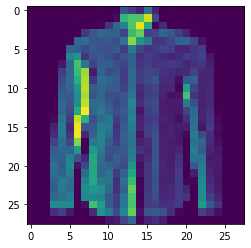

In [13]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

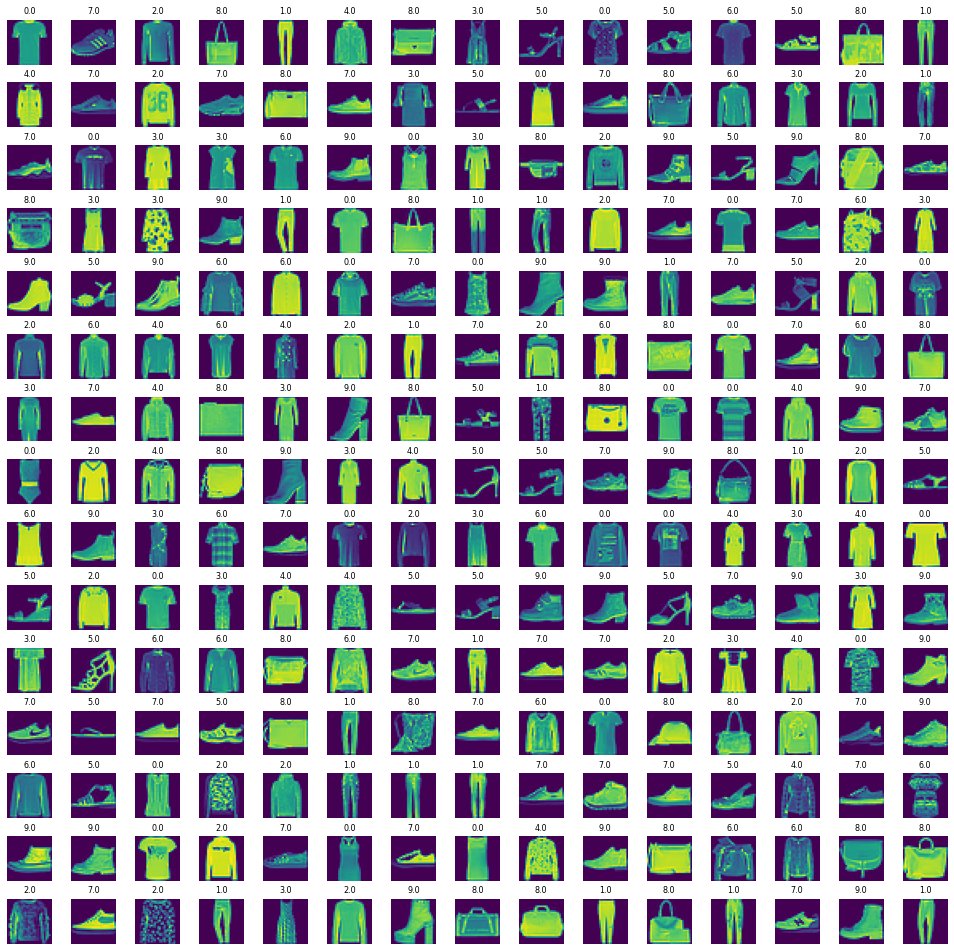

In [14]:
# Let's view more images in a grid format
# Define the dimension of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig,axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# SElect a random number from 0 to n_trainng
for i in np.arange(0,W_grid*L_grid): #create evenly spaced variables
    # Select a random number 
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize =8)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [15]:
# TRAINING THE MODEL

In [16]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [17]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [20]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [21]:
X_train.shape

(48000, 28, 28, 1)

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
import keras 

Using TensorFlow backend.
/home/vineet/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vineet/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vineet/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vineet/.local/lib/python3.7/site-packages/tensorflow/python

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [54]:
cnn_model = Sequential()

In [56]:
cnn_model.add(Conv2D(64,3,3,input_shape = (28,28,1),activation = 'relu'))

/home/vineet/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [57]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [58]:
cnn_model.add(Flatten())

In [59]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/home/vineet/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [60]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/home/vineet/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [61]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [62]:
epochs= 50

In [63]:
cnn_model.fit(X_train,y_train,batch_size = 512, nb_epoch= epochs, verbose = 1, validation_data = (X_validate, y_validate))

/home/vineet/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 63s 1ms/step - loss: 0.8507 - accuracy: 0.6981 - val_loss: 0.4818 - val_accuracy: 0.8282
Epoch 2/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.4408 - accuracy: 0.8441 - val_loss: 0.4071 - val_accuracy: 0.8524
Epoch 3/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3755 - accuracy: 0.8675 - val_loss: 0.3550 - val_accuracy: 0.8766
Epoch 4/50
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3431 - accuracy: 0.8789 - val_loss: 0.3318 - val_accuracy: 0.8829
Epoch 5/50
48000/48000 [==============================] - 80s 2ms/step - loss: 0.3166 - accuracy: 0.8884 - val_loss: 0.2981 - val_accuracy: 0.8963
Epoch 6/50
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2906 - accuracy: 0.8971 - val_loss: 0.2902 - val_accuracy: 0.8972
Epoch 7/50
48000/48000 [==============================] - 75s 2ms/st

In [ ]:
# EVALUATION OF THE MODEL

In [71]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1])) # 1st element is loss and 2nd element is accuracy

10000/10000 [==============================] - 2s 156us/step
Test Accuracy : 0.918


In [72]:
predicted_classes = cnn_model.predict_classes(X_test)

In [73]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

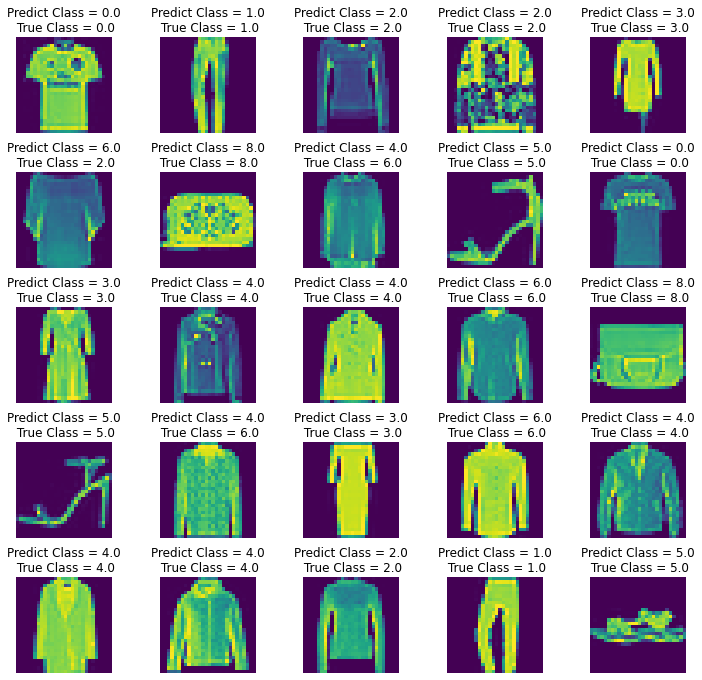

In [74]:
L=5
W=5
fig,axes = plt.subplots(L,W,figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predict Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

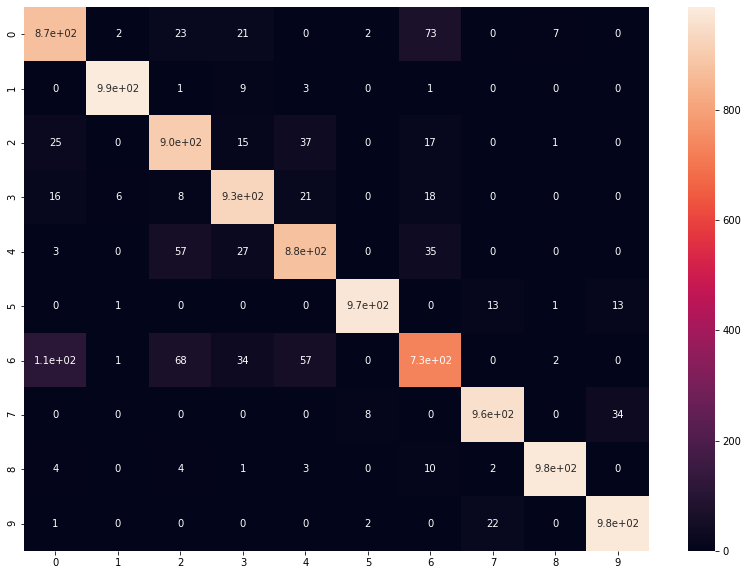

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot= True)
#sum the diagonal element to get the total true correct values

In [76]:
from sklearn.metrics import classification_report

num_classes = 10 
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test,predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.87      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.85      0.91      0.88      1000
     Class 3       0.90      0.93      0.91      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.73      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [77]:
#improving the model - change filter from 32 to 64  